In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Датасет 1

In [7]:
x1 = np.linspace(0,15,100)
y1 = x1 +np.random.random(100)*2-1

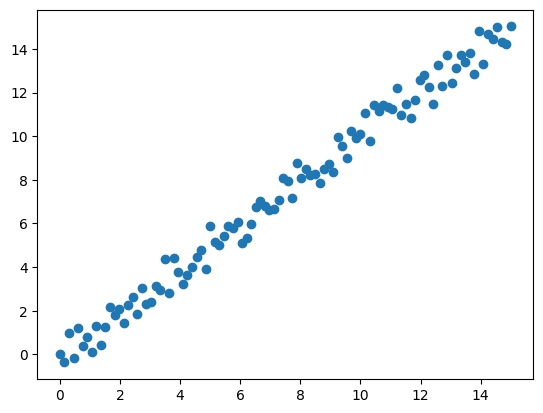

In [8]:
plt.scatter(x1, y1)
plt.show()

#Датасет 2

In [64]:
x2 = np.linspace(0,15,120)
y2 = 3*x2 +np.random.random(120)*3

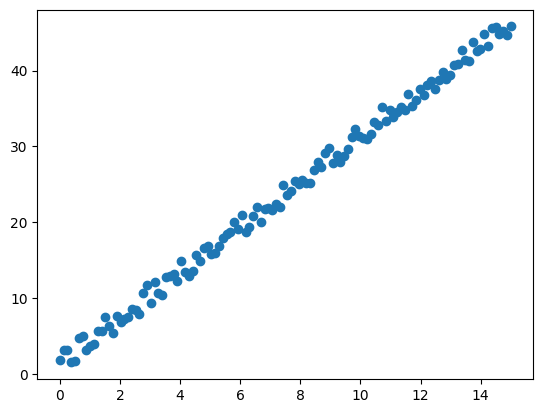

In [65]:
plt.scatter(x2, y2)
plt.show()

#Датасет 3

In [116]:
x3 = np.linspace(0,20,120)
y3 = 2*x3 +np.random.random(120)*3

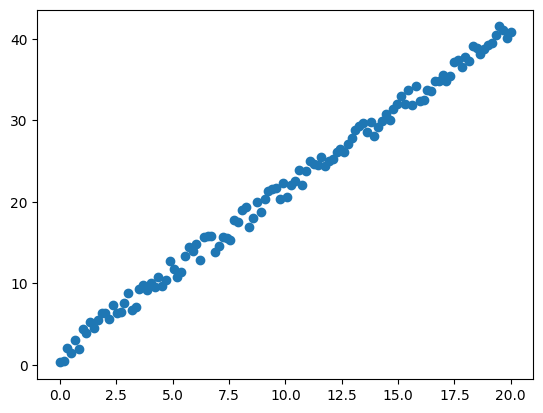

In [117]:
plt.scatter(x3, y3)
plt.show()

#Модель линейной регресси

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [22]:
print(x1.shape)
print(y1.shape)

(100,)
(100,)


In [25]:
X_train = x1.reshape(-1, 1)
Y_train = y1.reshape(-1, 1)

In [27]:
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)  

In [101]:
lin_reg = LinearRegression() 
lin_m = lin_reg.fit(x_train_lin, y_train_lin)
lin_m

In [105]:
import pickle

In [106]:
with open('myfile.pkl', 'wb') as output:
    pickle.dump(lin_m, output)

In [107]:
with open('myfile.pkl', 'rb') as f:
  data_new = pickle.load(f)

In [109]:
result = data_new.score(x_test_lin, y_test_lin)
print(result)

0.9873791180718893


#Датасет с шумом

In [46]:
x4 = np.linspace(0,15,100)
y4 = -1*x4 +np.random.random(100)*2-1
y4[20:40]*=2

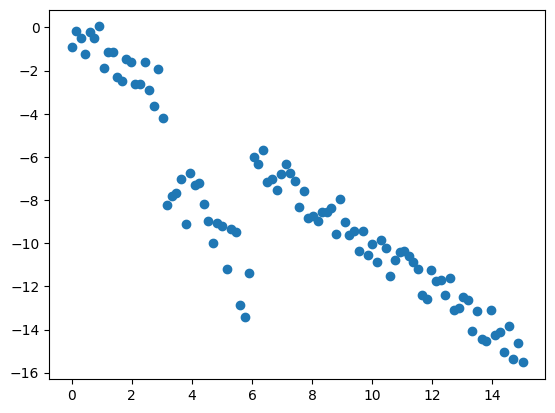

In [47]:
plt.scatter(x4, y4)
plt.show()

#Тестирование работы модели

In [142]:
import pytest

In [198]:
%%writefile test.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x3 = np.linspace(0,20,120)
  y3 = 2*x3 +np.random.random(120)*3
  pred3 = lin_m.predict(x3.reshape(-1,1))
  mse3 = mse(y3, pred3)
  r3= r2_score(y3, pred3)
  assert mse3 > 0
  assert r3 > -1

Overwriting test.py


In [199]:
!cat test.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x3 = np.linspace(0,20,120)
  y3 = 2*x3 +np.random.random(120)*3
  pred3 = lin_m.predict(x3.reshape(-1,1))
  mse3 = mse(y3, pred3)
  r3= r2_score(y3, pred3)
  assert mse3 > 0
  assert r3 > -1


In [200]:
!pytest -v test.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 1 item                                                               

test.py::test3 PASSED                                                    [100%]

============================== 1 passed in 0.76s ===============================


In [201]:
%%writefile test_lin.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x4 = np.linspace(0,15,100)
  y4 = -1*x4 +np.random.random(100)*2-1
  y4[20:40]*=2  
  pred4 = lin_m.predict(x4.reshape(-1,1))
  mse4 = mse(y4, pred4)
  r4= r2_score(y4, pred4)
  assert mse4 > 0
  assert r4 > -1

Overwriting test_lin.py


In [202]:
!cat test_lin.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x4 = np.linspace(0,15,100)
  y4 = -1*x4 +np.random.random(100)*2-1
  y4[20:40]*=2  
  pred4 = lin_m.predict(x4.reshape(-1,1))
  mse4 = mse(y4, pred4)
  r4= r2_score(y4, pred4)
  assert mse4 > 0
  assert r4 > -1


In [203]:
!pytest -v test_lin.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 1 item                                                               

test_lin.py::test3 FAILED                                                [100%]

=================================== FAILURES ===================================
____________________________________ test3 _____________________________________

lin_m = LinearRegression()

    def test3(lin_m):
      x4 = np.linspace(0,15,100)
      y4 = -1*x4 +np.random.random(100)*2-1
      y4[20:40]*=2
      pred4 = lin_m.predict(x4.reshape(-1,1))
      mse4 = mse(y4, pred4)
      r4= r2_score(y4, pred4)
      assert mse4 > 0
>     assert r4 > -1
E     assert -17.10987735261952 > -1

test_lin.py:20: AssertionError
=========================== short test summary info ============================
FAILED 

In [204]:
pred4 = lin_reg.predict(x4.reshape(-1,1))
mse4 = mse(y4, pred4)
r4= r2_score(y4, pred4)
print(mse4)
print(r4)

321.0832991777199
-17.271919668069597


Действительно, несмотр на то, что r2 может быть отрицательным, но не настолько большим.